In [1]:
import tushare as ts
import matplotlib.pyplot as plt

In [2]:
hs300 = ts.get_hist_data('hs300')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [4]:
hs300['close'].head(10)

date
2021-01-29    5351.96
2021-01-28    5377.14
2021-01-27    5528.00
2021-01-26    5512.97
2021-01-25    5625.92
2021-01-22    5569.78
2021-01-21    5564.97
2021-01-20    5476.43
2021-01-19    5437.52
2021-01-18    5518.52
Name: close, dtype: float64

In [5]:
hs300=hs300.sort_index()

In [11]:
import numpy as np
import pandas as pd

In [14]:
spread=3
# hs300['short']=np.round(pd.rolling_mean(hs300['close'],window=10),2)
hs300['short']=hs300.close.rolling(10).mean()
hs300['long']=hs300.close.rolling(40).mean()

In [15]:
hs300['short-long']=hs300['short']-hs300['long']

In [18]:
from matplotlib import pyplot

In [16]:
%matplotlib inline

<AxesSubplot:xlabel='date'>

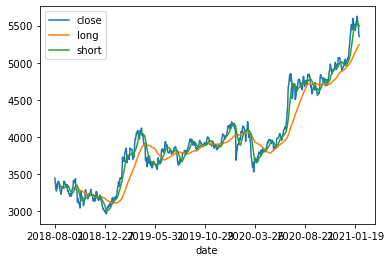

In [21]:
hs300[['close','long','short']].plot()

In [22]:
hs300['signal']=np.where(hs300['short-long']>3,1,0)

In [31]:
hs300['signal']=np.where(hs300['short-long']<3,-1,hs300['signal'])

<AxesSubplot:xlabel='date'>

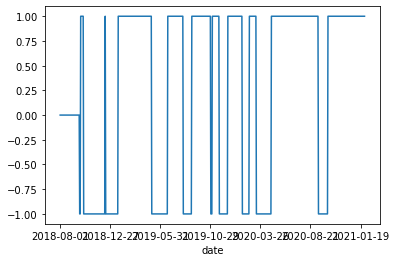

In [32]:
hs300['signal'].plot()

In [29]:
hs300['ma10']=hs300.close.rolling(10).mean()
hs300['ewm10']=hs300.close.ewm(span=10).mean()

<AxesSubplot:xlabel='date'>

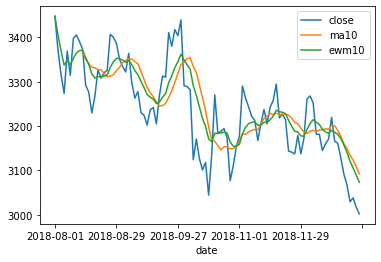

In [30]:
hs300[['close','ma10','ewm10']][:100].plot()

# 资金曲线

In [33]:
hs300['market']=np.log(hs300['close']/hs300['close'].shift(1))

In [37]:
hs300['strategy']=hs300['signal'].shift(1)*hs300['market']

<AxesSubplot:xlabel='date'>

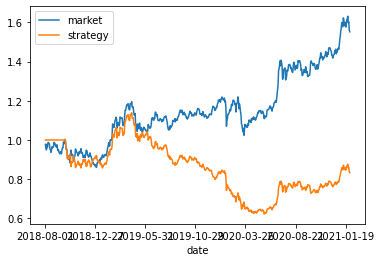

In [39]:
hs300[['market','strategy']].cumsum().apply(np.exp).plot()

In [40]:
import numpy as np
import pandas as pd
import tushare as ts
import talib as ta

ModuleNotFoundError: No module named 'talib'